$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge make$ $\hspace{0.1cm}$ $\Huge a$ $\hspace{0.1cm}$ $\Huge CMB$ $\hspace{0.1cm}$ $\Huge map$ $\hspace{0.1cm}$ $\Huge using$ $\hspace{0.1cm}$ $\Huge a$ $\hspace{0.1cm}$ $\Huge CAMB$ $\hspace{0.1cm}$ $\Huge .dat$ $\hspace{0.1cm}$ $\Huge file$ $\Huge :$ 

# TO DO : 

# Modules : 

In [1]:
import healpy as hp
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
from astropy.io import fits
import numpy as np
import fbasic as fb

# Function : 

In [4]:
def CMB_make_CAMB(data_path,file_name,nside,name_writemap,title_map,maps_unit,pictures_path,name_imfile,lmax,
                  name_imPS): 
    
        
    """
    Function which compute a CMB map from a power spectrum.

    Parameters
    ----------
    
    data_path : str
        Path were the data of the maps are stored and we the cutout are going to be stored. 
    file_name : str
        Name of the .dat contaning the values of the power spectrum given by CAMB.
    nside : int
        Resolution of the map. The power spectrum will go until l = 3 * nside -1.
    name_writemap : str 
        Name of the FITS file under which the map is going to be saved. 
    title_map : str 
        Title displayed on the image of the Healpix map.
    maps_unit : str 
        Unit displayed on the image of the Healpix map.         
    pictures_path : str 
        Path where we are going to save the pictures. 
    name_imfile : str 
        Name under which the image of the map is going to be saved. 
    lmax : int 
        Maximum Multipole desired or that can be reach by the data, in which case lmax = 3*nside-1
    name_imPS : str 
        Name given to the image containing the power spectrum of your CMB map. 
        
    Returns
    -------
    str
        Tell us where the function stored the images. 

    """
    
    #Load the datas : 
    data = np.loadtxt(data_path + file_name)
    TT_data = data[:,1] # Take only the first column, which is the temperature T

    #Vairables : 
    ell = np.arange(2,lmax) #Array going from 2 to lmax
    ellfactor = ell*(ell+1)/(2.*np.pi) #Array containing all the values of the factor used in CMB science 

    TT = TT_data[ell] / ellfactor #The file given by CAMB is the power spectrum multiplied by this factor 
    #Because the monopole and dipole are not in the data of the power spectrum given by CAMB we need to add them back
    #They need to be 0 because we usually remove them no to influence our studies. 
    TT_1 = np.insert(TT,0,0)
    TT_final = np.insert(TT_1,0,0)
    
    fb.file2FITS(data=TT_final,dtype=np.float32,data_path=data_path,name_save='TT_CMB_CAMB_'+str(nside), overwrite=True)

    #Compute the CMB map from the power spectrum :
    CMB = hp.sphtfunc.synfast(TT_final, nside, lmax=lmax, mmax=lmax, alm=False, pol=False, pixwin=False)  
    hp.write_map(data_path + name_writemap,CMB,overwrite=True) # Wrtie the map as a FITS file
    hp.mollview(map=CMB,coord=None, nest=False, title=title_map, unit=maps_unit, norm='hist')
    plt.savefig(pictures_path + name_imfile  + '.png') #Save the image of the filtered map 
    plt.show()
    
    #Display the Power spectrum
    fig, ax = plt.subplots()
    ax.plot(ell,TT_final[ell]*ellfactor,'-') #Display the power spectrum multiply by the ell factor
    ax.set_title('$CMB$ $power$ $spectrum$',fontsize=28)
    ax.set_xlabel('$l$',fontsize=28)
    ax.set_ylabel('$l(l+1)/2\pi C_{l}^{TT}$',fontsize=28) 
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.savefig(pictures_path + name_imPS + '.png') #Save the image of the power spectrum
    plt.show()
    
    #Feedback operator : 
    print('Images of the maps and Power spectrum saved at : '+pictures_path+' FITS files saves in : '+data_path)
    
    
    return CMB


# Launch : 

## Seghal(2010) :

/users/mcharmetant/anaconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:395: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


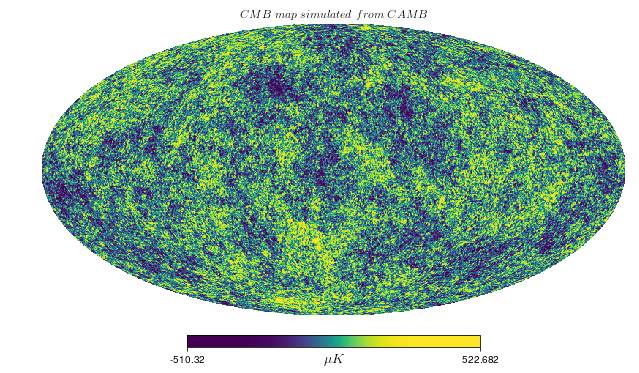

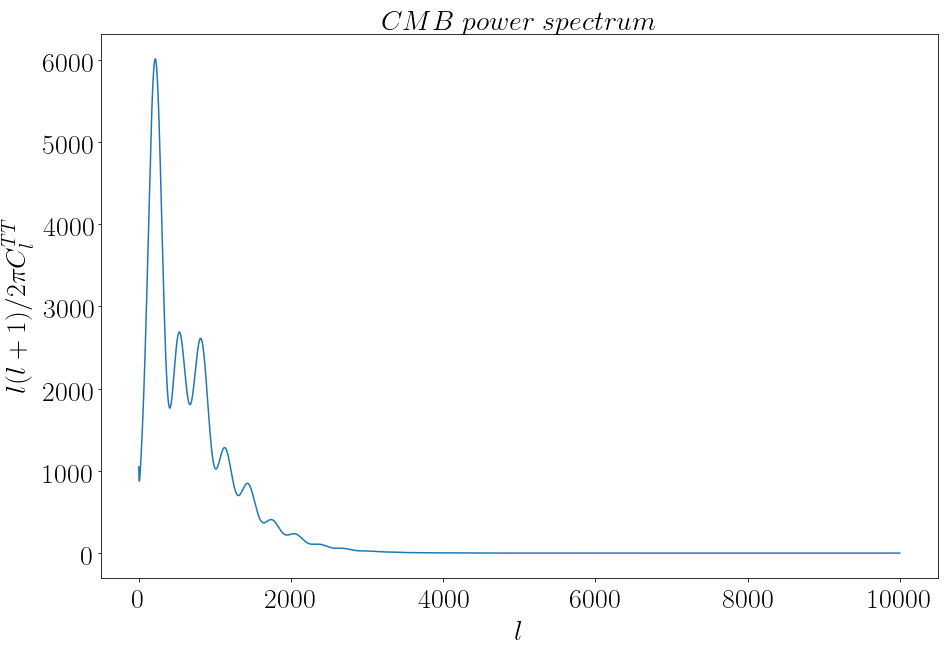

Images of the maps and Power spectrum saved at : /users/mcharmetant/Desktop/Pictures/ FITS files saves in : /vol/aibn1118/data1/mcharmetant/Data/Simons_Obs_2010/


array([44.04465968, 43.73278443, 49.35224762, ...,  5.14025235,
        6.38462988,  4.22782336])

In [5]:
CMB_make_CAMB(data_path='/vol/aibn1118/data1/mcharmetant/Data/Simons_Obs_2010/',
              file_name='CMB_8192.dat',
              nside=8192,
              name_writemap='test.fits',
              title_map='$CMB$ $map$ $simulated$ $from$ $CAMB$',
              maps_unit='$\mu K$',
              pictures_path='/users/mcharmetant/Desktop/Pictures/',
              name_imfile='test',
              lmax=10000,
              name_imPS='PS_CMB_8192_CAMB')